## Introduction
This data set is a Beer data-set for your Data Science case-study round. <br>
You are expected to build a Machine Learning model which predicts the overall rating of the beer. (“review/overall”
column in “train.csv” is your dependent variable.)

<b> The train.csv contains the following columns:<br></B>
● index - an identifier for the review<br>
● beer/ABV - the alcohol by volume of the beer<br>
● beer/beerId - a unique ID indicating the beer reviewed<br>
● beer/brewerId - a unique ID indicating the brewery<br>
● beer/name - name of the beer<br>
● beer/style<br>
● review/appearance - rating of the beer's appearance (1.0 to 5.0)<br>
● review/aroma - rating of the beer's aroma (1.0 to 5.0)<br>
● review/overall - rating of the beer overall (1.0 to 5.0)<br>
● review/palate - rating of the beer's palate (1.0 to 5.0)<br>
● review/taste - rating of the beer's taste (1.0 to 5.0)<br>
● review/text - the text of the review<br>
● review/timeStruct - a dict specifying when the review was submitted<br>
● review/timeUnix<br>
● user/ageInSeconds - age of the user in seconds<br>
● user/birthdayRaw<br>
● user/birthdayUnix<br>
● user/gender - gender of the user (if specified)<br>
● user/profileName - profile name of the user<br>


In [469]:
class color:
   PURPLE = '\033[95m'
   CYAN = '\033[96m'
   DARKCYAN = '\033[36m'
   BLUE = '\033[94m'
   GREEN = '\033[92m'
   YELLOW = '\033[93m'
   RED = '\033[91m'
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

In [470]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

pd.set_option('display.max_columns',10000)
pd.set_option('display.max_rows',10000)
pd.set_option('display.max_colwidth',10000)

In [471]:
df = pd.read_csv('train.csv')

In [472]:
df.head(1)

,index,beer/ABV,beer/beerId,beer/brewerId,beer/name,beer/style,review/appearance,review/aroma,review/overall,review/palate,review/taste,review/text,review/timeStruct,review/timeUnix,user/ageInSeconds,user/birthdayRaw,user/birthdayUnix,user/gender,user/profileName
0,40163,5.0,46634,14338,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",1229398690,NaN,NaN,NaN,NaN,RblWthACoz


In [473]:
df.shape

(37500, 19)

In [474]:
df.columns

Index(['index', 'beer/ABV', 'beer/beerId', 'beer/brewerId', 'beer/name',
       'beer/style', 'review/appearance', 'review/aroma', 'review/overall',
       'review/palate', 'review/taste', 'review/text', 'review/timeStruct',
       'review/timeUnix', 'user/ageInSeconds', 'user/birthdayRaw',
       'user/birthdayUnix', 'user/gender', 'user/profileName'],
      dtype='object')

In [475]:
df.columns = ['index', 'beer_ABV', 'beer_beerId', 'beer_brewerId', 'beer_name',
       'beer_style', 'review_appearance', 'review_aroma', 'review_overall',
       'review_palate', 'review_taste', 'review_text', 'review_timestruct',
       'review_timeunix', 'user_age_insecs', 'user_birthday_raw',
       'user_birthday_unix', 'user_gender', 'user_profileName']

In [476]:
# Removing Id columns:
id = df[['index','beer_beerId','beer_brewerId']]
df.drop(['index','beer_beerId','beer_brewerId'],inplace = True,axis = 1)

In [477]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37500 entries, 0 to 37499
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   beer_ABV            37500 non-null  float64
 1   beer_name           37500 non-null  object 
 2   beer_style          37500 non-null  object 
 3   review_appearance   37500 non-null  float64
 4   review_aroma        37500 non-null  float64
 5   review_overall      37500 non-null  float64
 6   review_palate       37500 non-null  float64
 7   review_taste        37500 non-null  float64
 8   review_text         37490 non-null  object 
 9   review_timestruct   37500 non-null  object 
 10  review_timeunix     37500 non-null  int64  
 11  user_age_insecs     7856 non-null   float64
 12  user_birthday_raw   7856 non-null   object 
 13  user_birthday_unix  7856 non-null   float64
 14  user_gender         15314 non-null  object 
 15  user_profileName    37495 non-null  object 
dtypes: f

In [478]:
df.describe()

,beer_ABV,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_timeunix,user_age_insecs,user_birthday_unix
count,37500.000000,37500.000000,37500.000000,37500.00000,37500.000000,37500.000000,3.750000e+04,7.856000e+03,7.856000e+03
mean,7.403725,3.900053,3.873240,3.88944,3.854867,3.922440,1.232794e+09,1.176705e+09,2.416303e+08
std,2.318145,0.588778,0.680865,0.70045,0.668068,0.716504,7.190955e+07,3.375514e+08,3.375514e+08
min,0.100000,0.000000,1.000000,0.00000,1.000000,1.000000,9.262944e+08,7.034366e+08,-2.208960e+09
25%,5.400000,3.500000,3.500000,3.50000,3.500000,3.500000,1.189194e+09,9.794810e+08,1.433628e+08
50%,6.900000,4.000000,4.000000,4.00000,4.000000,4.000000,1.248150e+09,1.100009e+09,3.183264e+08
75%,9.400000,4.500000,4.500000,4.50000,4.500000,4.500000,1.291330e+09,1.274973e+09,4.388544e+08
max,57.700000,5.000000,5.000000,5.00000,5.000000,5.000000,1.326267e+09,3.627295e+09,7.148988e+08


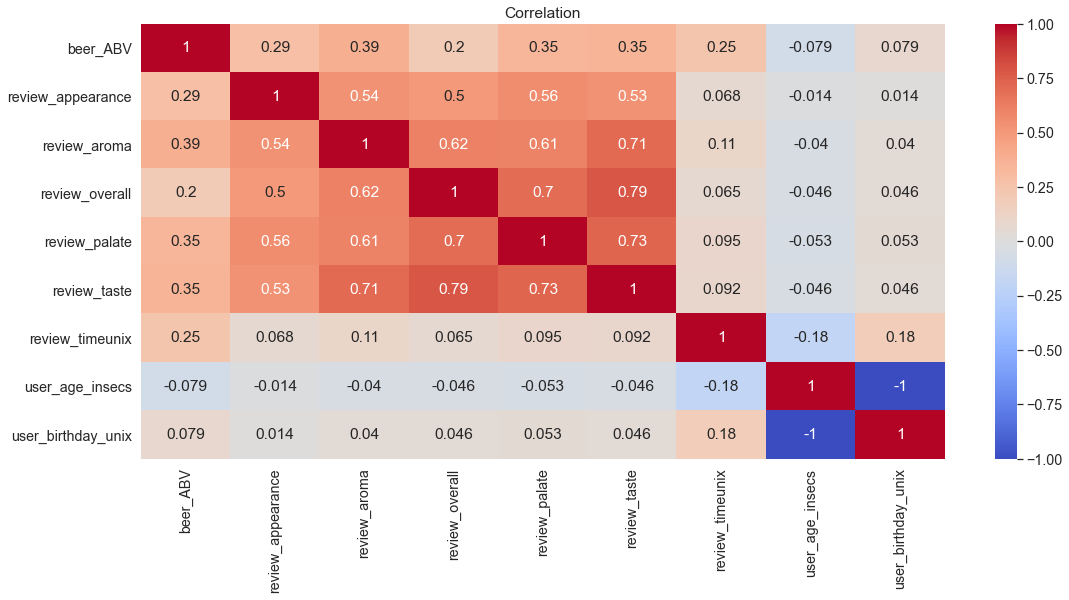

In [479]:
sns.set_style("darkgrid")
plt.figure(figsize= (18,8))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(min_periods=1),annot= True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

In [480]:
# Lets look at the value counts
df['review_overall'].value_counts(dropna = True)

4.0    13868
4.5     8666
3.5     6551
3.0     3319
5.0     2671
2.5     1193
2.0      807
1.5      248
1.0      176
0.0        1
Name: review_overall, dtype: int64

In [481]:
for i in df.columns:
    print(color.BOLD,color.RED,"Column Name :",i,color.END)
    print(df[i].value_counts(dropna = True))
    print(color.BOLD,'*****************************************************',color.END)

  Column Name : beer_ABV 
6.50     2096
5.00     2015
8.30     1890
6.60     1848
9.40     1847
5.40     1711
12.00    1500
11.20    1441
8.50     1349
4.40     1341
5.50     1191
10.50    1150
7.20     1133
7.00     1063
10.00     899
9.00      778
10.20     778
4.70      771
9.80      655
6.00      653
6.10      597
6.90      548
10.60     482
4.90      477
5.70      472
3.50      461
8.20      454
5.20      448
8.00      435
8.10      431
5.60      391
4.50      383
4.30      370
9.20      340
7.50      307
6.20      298
4.80      297
5.80      297
6.80      292
4.00      205
8.60      201
8.40      194
5.90      194
5.10      188
9.50      172
5.30      160
4.20      151
5.79      143
6.30      131
11.00     122
7.60      116
4.60      116
7.70      106
13.00     101
4.75       93
4.19       89
3.80       72
10.40      72
6.40       69
6.70       67
7.40       63
10.80      47
7.10       38
8.80       34
7.75       33
11.30      33
5.59       32
5.11       30
11.50      29
9.60    

1.080573e+09    76
1.137507e+09    59
1.351347e+09    56
1.189001e+09    52
9.050042e+08    48
1.215789e+09    48
1.579702e+09    47
1.301757e+09    45
1.244301e+09    42
1.378563e+09    40
9.285950e+08    39
1.007734e+09    39
1.270825e+09    38
1.019229e+09    37
1.140534e+09    37
1.205939e+09    37
1.159798e+09    35
3.581417e+09    35
1.307459e+09    35
1.204384e+09    34
1.102601e+09    34
1.284822e+09    33
1.077376e+09    33
1.908457e+09    33
1.234447e+09    32
1.021475e+09    32
1.442585e+09    32
9.837182e+08    32
1.037455e+09    30
1.094307e+09    30
1.051629e+09    29
1.263823e+09    29
1.215529e+09    29
1.217344e+09    28
1.018365e+09    28
1.813936e+09    27
1.129471e+09    27
1.170166e+09    27
1.235833e+09    27
9.563294e+08    27
1.274541e+09    27
1.571321e+09    27
1.195654e+09    27
1.112022e+09    26
9.994394e+08    26
9.917534e+08    26
1.042207e+09    26
1.125670e+09    25
1.045494e+09    25
1.368630e+09    25
3.627295e+09    25
1.050246e+09    25
9.818138e+08

Name: user_profileName, dtype: int64
 ***************************************************** 


In [482]:
# checking for null %
print((df.isnull().sum()/df.shape[0])*100)

beer_ABV               0.000000
beer_name              0.000000
beer_style             0.000000
review_appearance      0.000000
review_aroma           0.000000
review_overall         0.000000
review_palate          0.000000
review_taste           0.000000
review_text            0.026667
review_timestruct      0.000000
review_timeunix        0.000000
user_age_insecs       79.050667
user_birthday_raw     79.050667
user_birthday_unix    79.050667
user_gender           59.162667
user_profileName       0.013333
dtype: float64


In [483]:
# Dropping columns
df.drop(['user_age_insecs','user_birthday_raw','user_birthday_unix' ],inplace=True,axis = 1)

In [484]:
# checking for null %
print((df.isnull().sum()/df.shape[0])*100)

beer_ABV              0.000000
beer_name             0.000000
beer_style            0.000000
review_appearance     0.000000
review_aroma          0.000000
review_overall        0.000000
review_palate         0.000000
review_taste          0.000000
review_text           0.026667
review_timestruct     0.000000
review_timeunix       0.000000
user_gender          59.162667
user_profileName      0.013333
dtype: float64


In [485]:
## Lets look at gender column
df.loc[df['user_gender'].isnull()].head(1)

,beer_ABV,beer_name,beer_style,review_appearance,review_aroma,review_overall,review_palate,review_taste,review_text,review_timestruct,review_timeunix,user_gender,user_profileName
0,5.0,Chiostro,Herbed / Spiced Beer,4.0,4.0,4.0,4.0,4.0,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.","{'min': 38, 'hour': 3, 'mday': 16, 'sec': 10, 'year': 2008, 'wday': 1, 'mon': 12, 'isdst': 0, 'yday': 351}",1229398690,NaN,RblWthACoz


In [486]:
# Now imputing the catgeorical variable gender with 'Unknown' as the gender is not known to us
df['user_gender'] = df['user_gender'].fillna('Unknown')

In [487]:
# checking for null %
print((df.isnull().sum()/df.shape[0])*100)

beer_ABV             0.000000
beer_name            0.000000
beer_style           0.000000
review_appearance    0.000000
review_aroma         0.000000
review_overall       0.000000
review_palate        0.000000
review_taste         0.000000
review_text          0.026667
review_timestruct    0.000000
review_timeunix      0.000000
user_gender          0.000000
user_profileName     0.013333
dtype: float64


In [488]:
# Let's look at the null values in other columns
df[df['user_profileName'].isnull()].shape

(5, 13)

In [489]:
df[df['review_text'].isnull()].shape

(10, 13)

In [490]:
# Lets drop this columns:
df.dropna(inplace=True)

In [491]:
# checking for null %
print((df.isnull().sum()/df.shape[0])*100)

beer_ABV             0.0
beer_name            0.0
beer_style           0.0
review_appearance    0.0
review_aroma         0.0
review_overall       0.0
review_palate        0.0
review_taste         0.0
review_text          0.0
review_timestruct    0.0
review_timeunix      0.0
user_gender          0.0
user_profileName     0.0
dtype: float64


### No null values now

In [492]:
# Now lets change the Datatype:
df.dtypes

beer_ABV             float64
beer_name             object
beer_style            object
review_appearance    float64
review_aroma         float64
review_overall       float64
review_palate        float64
review_taste         float64
review_text           object
review_timestruct     object
review_timeunix        int64
user_gender           object
user_profileName      object
dtype: object

In [493]:
x = df.loc[:,['beer_name','beer_style','review_text','review_overall']]
x.sort_values('review_overall',ascending = False)
x.loc[x['review_overall']==4].head(2)

,beer_name,beer_style,review_text,review_overall
0,Chiostro,Herbed / Spiced Beer,"Pours a clouded gold with a thin white head. Nose is quite floral with a larger amount of spices added. Definitely a spice forward fragrance. Flavor has an odd burn that hits on the first sip. After it fades it seems like a dirty vanilla aftertaste. Perhaps this is the absinthe? Regardless of that, I get a quite spiced tone on the tongue. Almost feel a little heat from it. I think that my inexperienced palate on these spices is contributing to my ignorance of what precisely they are. Overall a nice drinker indeed.",4.0
5,YouEnjoyMyStout,Russian Imperial Stout,"served in a snifter; on-tap at CBC.\t\tcolor is the typical imperial stout used motor oil black; impenetrable. by the time the beer arrived at our table the had had receded into a collar around the glass.\t\tnoses offers ample amounts of roastiness, chocolate, molasses and dark fruits, also an atypical tartness to it. not picking up much in the way of bourbon.\t\tflavor imparts more of the same: big notes of roasted malt with chocolate and molasses not far behind, also some dark fruit characters to it and a very distinct and unusual tartness, which adds almost a distinctive flair. more bourbon than i picked up in the aroma but still a subtle presence on that front. medium-full on the palate with average carbonation.\t\toverall a tasty and interesting beer. i like the unique element that the tartness bring; could use a bigger bourbon presence though. also priced very reasonably at $5.50 a glass.",4.0


In [494]:
print("Unique Beer Name count :", len(df['beer_name'].unique()))

Unique Beer Name count : 1688


In [495]:
print("Unique Beer Style count :", len(df['beer_style'].unique()))

Unique Beer Style count : 95


In [496]:
print("Unique Review Text count :", len(df['review_text'].unique()))

Unique Review Text count : 37477


In [497]:
print("Unique Overall count :", len(df['review_overall'].unique()))

Unique Overall count : 10


In [498]:
print(color.BOLD,"Total Number of Columns :",color.END,len(df.columns))

 Total Number of Columns :  13


In [499]:
m = []
for i in df['review_timeunix']:
    m.append(datetime.datetime.fromtimestamp(i).strftime('%Y-%m-%d %H:%M:%S'))
df['review_timeunix'] = m
df['review_timeunix'] = pd.to_datetime(df['review_timeunix'])

In [500]:
# Droping review_timestruct as it is similar as review_timeunix
df.drop('review_timestruct',inplace= True,axis = 1)

In [501]:
review_text = df['review_text']
df.drop('review_text',inplace = True,axis = 1)

## Data Preprocessing

In [502]:
df['user_gender'] = df['user_gender'].map({'Male' :1,'Female':0,'Unknown':2})

In [503]:
# 
import datetime as dt

df['review_year'] = df['review_timeunix'].dt.year
df['review_month'] = df['review_timeunix'].dt.month
df['review_day'] = df['review_timeunix'].dt.day
df['review_hour'] = df['review_timeunix'].dt.hour
df['review_min'] = df['review_timeunix'].dt.minute
df['review_sec'] = df['review_timeunix'].dt.second

df.drop(['review_timeunix','user_profileName'],inplace = True, axis =1)

In [504]:
df.groupby('beer_style')['review_overall'].sum()

beer_style
Altbier                                  443.5
American Adjunct Lager                   543.0
American Amber / Red Ale                1758.0
American Amber / Red Lager                81.5
American Barleywine                     2465.5
American Black Ale                       397.5
American Blonde Ale                      921.0
American Brown Ale                       931.5
American Dark Wheat Ale                   40.0
American Double / Imperial IPA         11107.5
American Double / Imperial Pilsner        38.0
American Double / Imperial Stout       19426.5
American IPA                           12328.0
American Malt Liquor                     147.5
American Pale Ale (APA)                 6504.5
American Pale Lager                      318.0
American Pale Wheat Ale                  406.0
American Porter                         6793.0
American Stout                          1735.0
American Strong Ale                      452.5
American Wild Ale                        303.0
Ba

In [505]:
df.groupby('beer_name')['review_overall'].sum()

beer_name
"The Wind Cried Mari..." Scottish Heather Ale                                 79.0
'Pooya Porter                                                                  4.0
1 A.M. Ale                                                                     8.0
10 Blocks South                                                                3.5
10 Year Clelebration Ale                                                       4.0
12 Year Anniversary Ale                                                        3.5
13th Anniversary Imperial India Pale Ale                                       3.5
16 Year Anniversary Ale                                                        9.0
1871 Lager                                                                     8.5
1906 Reserva Especial                                                         38.0
1984 Golden Ale                                                                8.0
1er Anniversaire                                                             

In [506]:
cols = ['beer_name', 'beer_style']
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in cols:
    df['le_'+i] = le.fit_transform(df[i])

In [507]:
df.drop(cols,inplace = True,axis = 1)

In [508]:
df.head()

,beer_ABV,review_appearance,review_aroma,review_overall,review_palate,review_taste,user_gender,review_year,review_month,review_day,review_hour,review_min,review_sec,le_beer_name,le_beer_style
0,5.0,4.0,4.0,4.0,4.0,4.0,2,2008,12,16,9,8,10,368,61
1,11.0,4.0,3.5,3.5,3.5,3.0,2,2008,8,9,5,8,58,153,4
2,4.7,3.5,4.0,3.5,3.5,3.5,1,2004,11,26,23,37,2,1044,14
3,4.4,3.0,3.0,2.5,3.0,3.0,1,2011,6,20,6,37,5,1174,35
4,4.4,4.0,3.0,3.0,3.5,2.5,2,2011,3,12,12,21,48,230,46


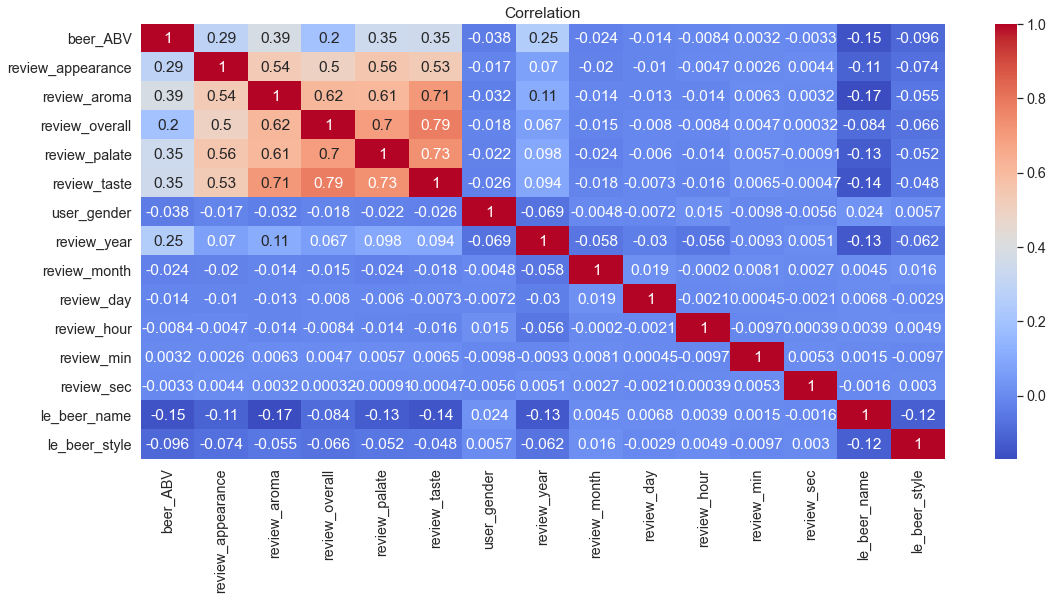

In [509]:
# Lets plot heatmap to check the correlation
sns.set_style("darkgrid")
plt.figure(figsize= (18,8))
sns.set(font_scale=1.3)
sns.heatmap(df.corr(min_periods=1),annot= True,cmap='coolwarm')
plt.title('Correlation')
plt.show()

### Spliting into X and y

In [510]:
y = df.pop('review_overall')
X = df

In [511]:
y.unique()

array([4. , 3.5, 2.5, 3. , 4.5, 2. , 5. , 1.5, 1. , 0. ])

In [512]:
y = y.astype('category').cat.codes

####  Train Test split

In [533]:
from sklearn.model_selection        import train_test_split
from sklearn.metrics                import r2_score,mean_squared_error,accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model           import LogisticRegression
from sklearn.tree                   import DecisionTreeClassifier
from sklearn.neighbors              import KNeighborsClassifier
from sklearn.discriminant_analysis  import LinearDiscriminantAnalysis
from sklearn.naive_bayes            import GaussianNB
from sklearn.svm                    import SVC
from sklearn.ensemble               import RandomForestClassifier
from sklearn.model_selection        import GridSearchCV


In [514]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 25)

### Logistic Regression

In [515]:
# Lets use the logistic regression
log = LogisticRegression(multi_class='multinomial', solver='newton-cg').fit(X_train,y_train)
y_pred_lr = log.predict(X_test)
lr_acc = round(accuracy_score(y_pred_lr,y_test)*(100),2)
print("Accuracy Score :",lr_acc,'%')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\optimize.py:211: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn("newton-cg failed to converge. Increase the "


### SVC

In [528]:
svc = SVC(gamma='auto')
svc.fit(X_train,y_train)
y_pred_svc = svc.predict(X_test)
svc_acc = round(accuracy_score(y_pred_svc,y_test)*(100),2)
print("Accuracy Score :",svc_acc,'%')

Accuracy Score : 36.99 %


### Decision Tree

In [525]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train,y_train)
y_pred_dtc = dtc.predict(X_test)
dtc_acc = round(accuracy_score(y_pred_dtc,y_test)*(100),2)
print("Accuracy Score :",dtc_acc,'%')

Accuracy Score : 40.34 %


### KNN

In [527]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred_knn = knn.predict(X_test)
knn_acc = round(accuracy_score(y_pred_knn,y_test)*(100),2)
print("Accuracy Score :",knn_acc,'%')

Accuracy Score : 30.95 %


### Random Forest

In [534]:

# specify number of folds for k-fold CV
n_folds=5

#List Hyperparameters that we want to tune
param_grid = {
    'max_depth': [4],
    'min_samples_leaf': [100],
    'min_samples_split':[100],
    'n_estimators': [100], 
    'max_features': [5]
}

# Create a based model
rf = RandomForestClassifier()

# Instantiate the grid search model
rf_gcv_smote = GridSearchCV(estimator=rf,param_grid=param_grid,cv=n_folds,n_jobs=-1,verbose = 1)

# Fit the grid search to the data
rf_gcv_smote.fit(X_train, y_train)

y_pred_rf_smote = rf_gcv_smote.predict(X_test)

# Making the Confusion Matrix

cm_rf_smote = confusion_matrix(y_test, y_pred_rf_smote)

print('\033[1m Accuracy for Random Forest is:\033[0m {0}'.format(accuracy_score(y_test,y_pred_rf_smote)))
print('\033[1m Confusion Matrix: \033[0m')
print(cm_rf_smote)
print('\033[1m Classification Report:\033[0m')
print(classification_report(y_test, y_pred_rf_smote))

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    5.1s finished


 Accuracy for Random Forest is: 0.5048017072736973
 Confusion Matrix: 
[[   0    0    0    1    0    0    0    0    0    0]
 [   0    0    0   24    1   15    1    6    0    0]
 [   0    0    0   39    1   30    5    1    0    0]
 [   0    0    0   68   22  152   10   11    0    0]
 [   0    0    0   28   15  209   47   43    2    0]
 [   0    0    0   16   12  418  313  212   16    1]
 [   0    0    0    3    2  178  694  980   68    0]
 [   0    0    0    1    1   69  369 3173  525   17]
 [   0    0    0    0    0    7   31 1409 1144   58]
 [   0    0    0    0    0    1    3  170  459  165]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00        47
           2       0.00      0.00      0.00        76
           3       0.38      0.26      0.31       263
           4       0.28      0.04      0.08       344
           5       0.39      0.42      0.40      

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### XG Boost

In [535]:
from xgboost import XGBClassifier
# Create a based model
xgb=XGBClassifier(random_state=123)

#List Hyperparameters that we want to tune
learning_rate=[0.001,0.01,0.1]
objective=["binary:logistic"]
eval_metric=["auc"]
n_estimators=[100,200]
max_depth=[3,5,7]

hyperparameters=dict(learning_rate=learning_rate,objective=objective,eval_metric=eval_metric,n_estimators=n_estimators,max_depth=max_depth)

# Instantiate the grid search model
xgb_gcv_smote =GridSearchCV(xgb,cv=5,param_grid=hyperparameters, n_jobs=-1,verbose=1)

xgb_gcv_smote.fit(X_train, y_train)

y_pred_xgb_smote = xgb_gcv_smote.predict(X_test)

# Making the Confusion Matrix

cm_xgb_smote = confusion_matrix(y_test, y_pred_xgb_smote)
print('\033[1m Accuracy for XG Boost is:\033[0m {0}'.format(accuracy_score(y_test,y_pred_xgb_smote)))
print('\033[1m Confusion Matrix: \033[0m')
print(cm_xgb_smote)
print('\033[1m Classification Report:\033[0m')
print(classification_report(y_test, y_pred_xgb_smote))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  8.4min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed: 19.3min finished


 Accuracy for XG Boost is: 0.5316556998043749
 Confusion Matrix: 
[[   0    0    0    1    0    0    0    0    0    0]
 [   0   17   10   14    6    0    0    0    0    0]
 [   0   14   16   32   10    3    1    0    0    0]
 [   0    4   19  116   71   46    5    2    0    0]
 [   0    2    3   54   96  127   34   26    2    0]
 [   0    0    2   25   57  450  291  148   13    2]
 [   0    1    1    8   22  211  765  842   72    3]
 [   0    1    1    2    8   85  397 2985  636   40]
 [   0    0    0    0    2    8   46 1191 1240  162]
 [   0    0    0    0    0    2    7  129  366  294]]
 Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.44      0.36      0.40        47
           2       0.31      0.21      0.25        76
           3       0.46      0.44      0.45       263
           4       0.35      0.28      0.31       344
           5       0.48      0.46      0.47       988


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
